In [1]:
# Bibliotecas

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
import matplotlib.pyplot as plt


from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Dataset
df = pd.read_csv("/home/eduardomdalmaso/Documents/alura/regressao_linear_1/data/usina.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [3]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
# Avaliando correlação
corr = df.corr()
corr['PE']

AT   -0.948128
V    -0.869780
AP    0.518429
RH    0.389794
PE    1.000000
Name: PE, dtype: float64

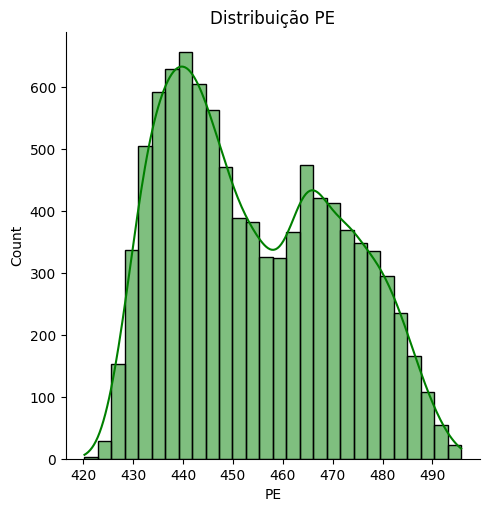

In [5]:
# Distribuição
sns.displot(df['PE'], kde=True, color='green')
plt.title('Distribuição PE')
plt.show()

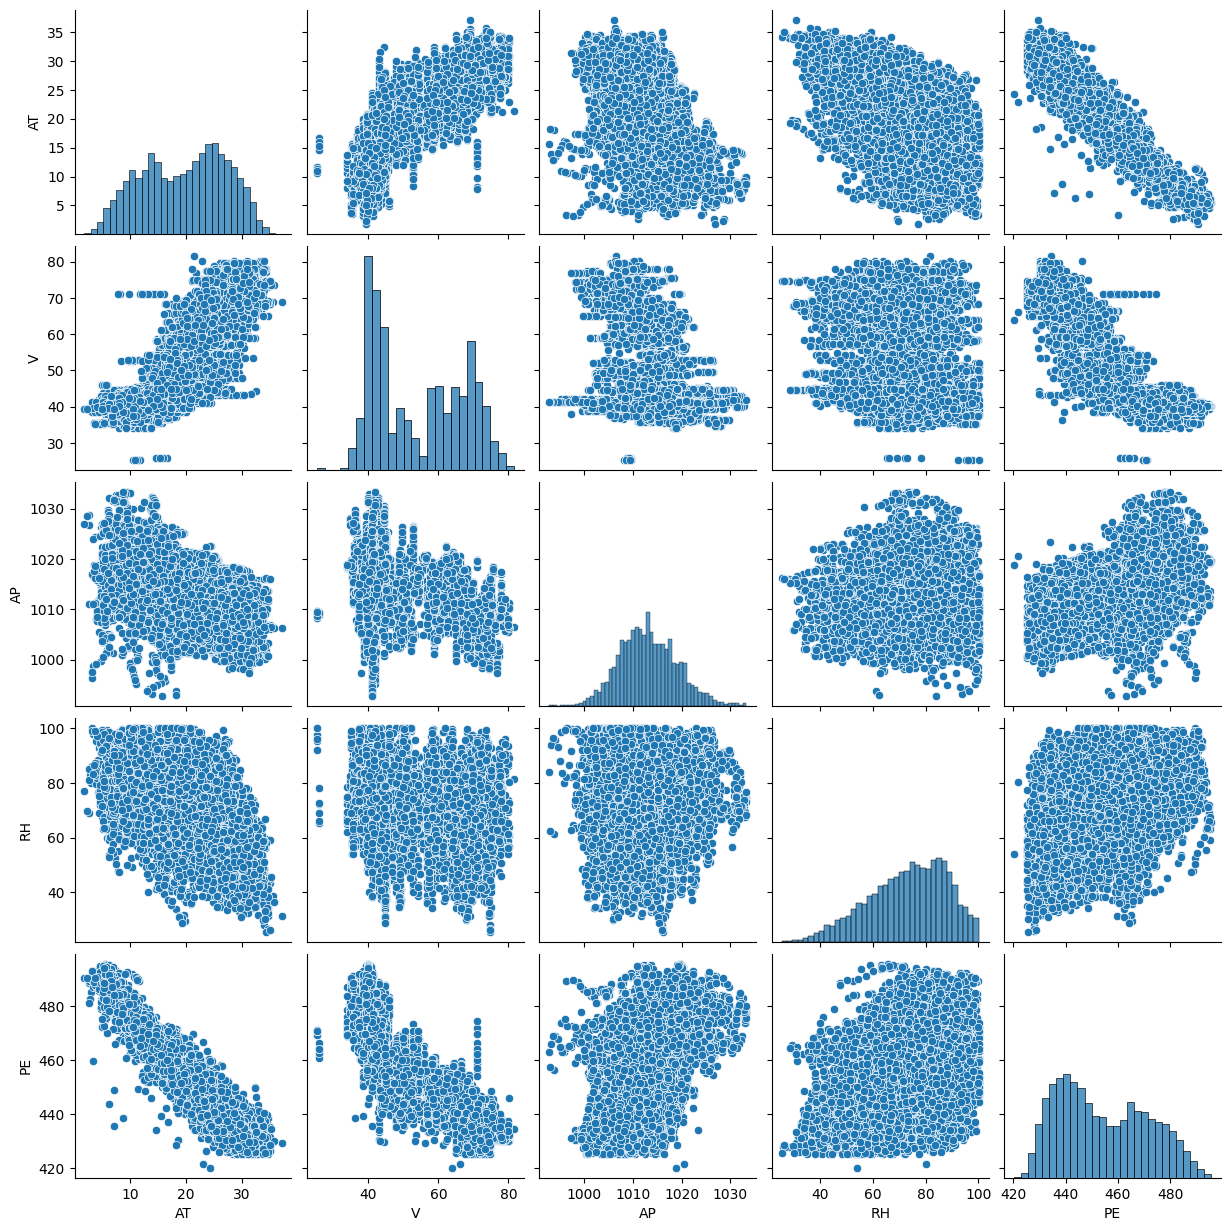

In [6]:
# Verificando combinações
sns.pairplot(df)

In [7]:
# Criando modelo
y = df['PE']
X = df.drop(columns='PE')

# Separando variaveis
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

df_train = pd.DataFrame(data=X_train)
df_train['PE'] = y_train

X_train = sm.add_constant(X_train)

In [8]:
X_train.columns

Index(['const', 'AT', 'V', 'AP', 'RH'], dtype='object')

In [9]:
modelo = sm.OLS(y_train,
                X_train[['const', 'AT', 'V', 'AP', 'RH']]).fit()

In [10]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.155e+04
Date:                Sun, 04 Aug 2024   Prob (F-statistic):               0.00
Time:                        15:46:41   Log-Likelihood:                -19688.
No. Observations:                6697   AIC:                         3.939e+04
Df Residuals:                    6692   BIC:                         3.942e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        448.5613     11.745     38.192      0.0

In [11]:
print("R²")
print("Modelo:", modelo.rsquared)

R²
Modelo: 0.9279441090358654


In [12]:
modelo.params

const    448.561318
AT        -1.964321
V         -0.240099
AP         0.068010
RH        -0.156453
dtype: float64

In [13]:
variaveis = ['const', 'AT', 'V', 'AP', 'RH']

vif = pd.DataFrame()
vif['variavel'] = variaveis

vif['vif'] = [variance_inflation_factor(
    X_train[variaveis],
    i
)for i in range(len(variaveis))]

vif

,variavel,vif
0,const,44081.431224
1,AT,5.985365
2,V,3.946105
3,AP,1.459264
4,RH,1.696572


In [15]:
# Análise de resíduos
y_previsto_train = modelo.predict(X_train[variaveis])

# Fazendo um scatter plot entre y_previsto e y_train
fig = px.scatter(x= y_previsto_train, y= y_train,
                 title='Previsão X Real',
                 labels={'x':'PE previsto','y':'PE real'})
fig.show()